In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from src.dm import DataModule

dm = DataModule(batch_size=2, train_trans={
    'HorizontalFlip': {'p': 0.5},
	'VerticalFlip': {'p': 0.5},
	'RandomRotate90': {'p': 0.5},
	'Transpose': {'p': 0.5}
    }
)
dm.setup()

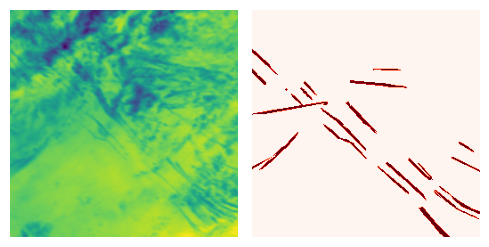

In [30]:
import matplotlib.pyplot as plt

images, masks = next(iter(dm.train_dataloader(shuffle=False)))

ix = 1
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(images[ix][0])
ax.axis('off')
ax = fig.add_subplot(1, 2, 2)
ax.imshow(masks[ix], cmap='Reds')
ax.axis('off')
plt.tight_layout()
plt.show()